In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('anrufzeiten2.CSV')
df1 = pd.DataFrame(df)

In [3]:
df['anrufzeit'] = pd.to_datetime(df.anrufzeit)

df['day'] = df.anrufzeit.dt.day 
#df['day_name'] = df.anrufzeit.dt.day_name
df['hour'] = df.anrufzeit.dt.hour

df['calldate'] = df.anrufzeit.dt.date 
df['calltime'] = df.anrufzeit.dt.time
#df['callsperday'] = df.value_counts()

In [4]:
df['area'] = df.anrufzeit.dt.hour
df
#if df.area >= 16:
#    df.area == 'spät'
#else:
#    df.area == 'früh'
    
#for index, row in df.iterrows():
#    if row['area'] >= 16:
#        row['area'] == 'spät'
#    else:
#        df.area == 'früh'
#print(row['area'], row['day'])
df

df.loc[df.area <= 11, 'area'] = 1
df.loc[df.area == 11, 'area'] = 2
df.loc[df.area == 12, 'area'] = 2
df.loc[df.area == 13, 'area'] = 2
df.loc[df.area == 14, 'area'] = 2
df.loc[df.area == 15, 'area'] = 2
df.loc[df.area >= 16, 'area'] = 3
df.head(5)

,anrufzeit,day,hour,calldate,calltime,area
0,2020-09-01 09:18:00,1,9,2020-09-01,09:18:00,1
1,2020-09-02 12:11:00,2,12,2020-09-02,12:11:00,2
2,2020-09-03 14:48:00,3,14,2020-09-03,14:48:00,2
3,2020-09-03 15:26:00,3,15,2020-09-03,15:26:00,2
4,2020-09-08 13:55:00,8,13,2020-09-08,13:55:00,2


In [5]:
#df.day.value_counts().sort_index().plot.bar(figsize=(20,5))

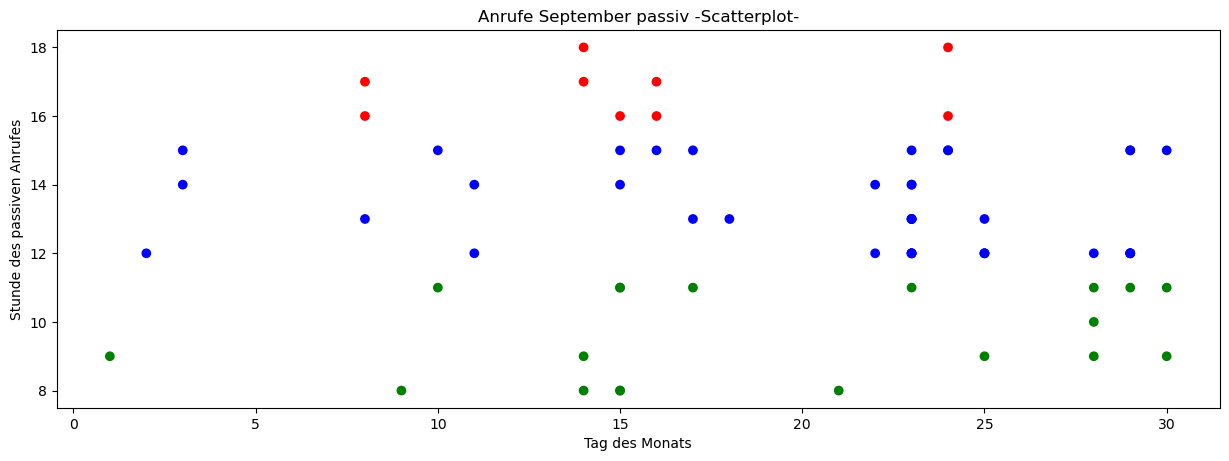

In [12]:
x = df.day
y = df.hour

colors = {1:'green', 2:'blue', 3:'red'}

plt.figure(figsize=(15, 5), dpi=100)
plt.scatter(x, y, c=df['area'].map(colors))
#plt.xlim(1, 31)
#plt.ylim(15, 19)
plt.title("Anrufe September passiv -Scatterplot-")
plt.xlabel("Tag des Monats")
plt.ylabel("Stunde des passiven Anrufes")
plt.savefig('scatter.png')
plt.show()

In [7]:
print(df.loc[df.area == 1, 'area'].count(), 'Anrufe gingen vor 12 Uhr ein')
print(df.loc[df.area == 2, 'area'].count(), 'Anrufe gingen von 12 bis 16 Uhr ein')
print(df.loc[df.area == 3, 'area'].count(), 'Anrufe gingen nach 16 Uhr ein')

19 Anrufe gingen vor 12 Uhr ein
40 Anrufe gingen von 12 bis 16 Uhr ein
9 Anrufe gingen nach 16 Uhr ein


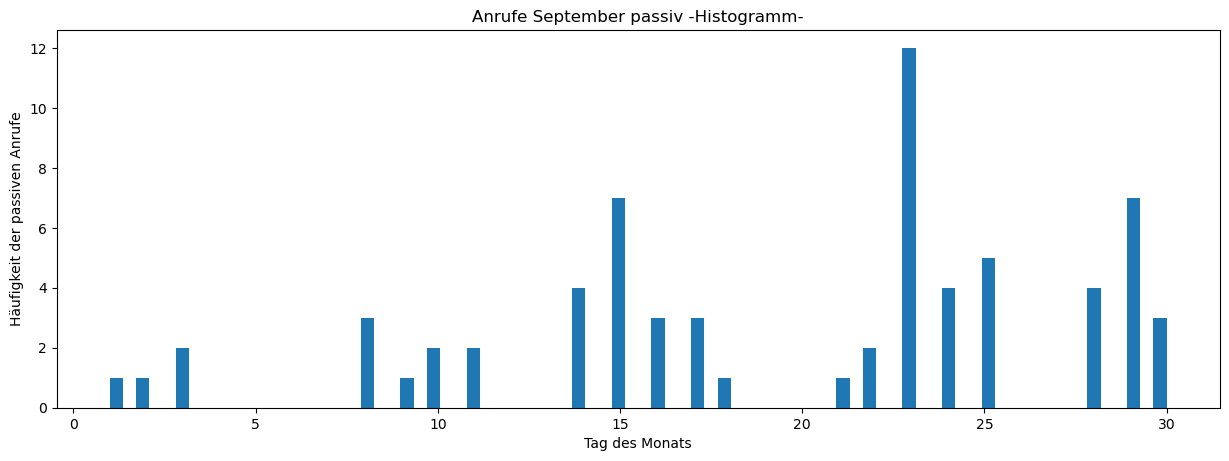

In [8]:
x = df.day
y = df.anrufzeit

plt.figure(figsize=(15, 5), dpi=100)
plt.hist(x, bins=80)
plt.title("Anrufe September passiv -Histogramm-")
plt.xlabel("Tag des Monats")
plt.ylabel("Häufigkeit der passiven Anrufe")
plt.savefig('hist.png')
plt.show()